In [ ]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
p1_data = pd.read_pickle("./hw3_p1.pkl")
print(p1_data.keys())

p1_x_train = p1_data["x_train"].copy()
p1_y_train = p1_data["y_train"].copy()
p1_x_test = p1_data["x_test"].copy()
p1_y_test = p1_data["y_test"].copy()

print("Train shape:", p1_x_train.shape, p1_y_train.shape)
print("Test shape:", p1_x_test.shape, p1_y_test.shape)  

dict_keys(['x_train', 'y_train', 'x_test', 'y_test'])
Train shape: (500, 2) (500,)
Test shape: (500, 2) (500,)


In [73]:
def euclidean_distance(x,z):
    return np.linalg.norm(x - z)**2


In [74]:
def kernel_distance(x,z):
    return (np.sum(x**2, axis=1)) * (np.sum(z**2))


In [ ]:
def knn_predict(x_train, y_train, x_test, k):
    n, d = x_test.shape
    k_pred = np.zeros(n, dtype=int)  
    e_pred = np.zeros(n, dtype=int)  

    y_train = y_train.astype(int)

    for i in range(n):
        e_distances = euclidean_distances(x_train, x_test[i]) 
        k_distances = kernel_distance(x_train, x_test[i])     

        k_indices = np.argsort(k_distances)[-k:]  
        k_labels = y_train[k_indices]
        k_pred[i] = np.bincount(k_labels).argmax()

        e_indices = np.argsort(e_distances)[:k]  
        e_labels = y_train[e_indices]
        e_pred[i] = np.bincount(e_labels).argmax()

    return k_pred, e_pred


In [ ]:
k_pred, e_pred = knn_predict(p1_x_train, p1_y_train, p1_x_test, k=25)

k_acc = np.mean(k_pred == p1_y_test)
e_acc = np.mean(e_pred == p1_y_test)

print("K Test Accuracy:", k_acc)
print("E Test Accuracy:", e_acc)

K Test Accuracy: 0.5
E Test Accuracy: 0.822


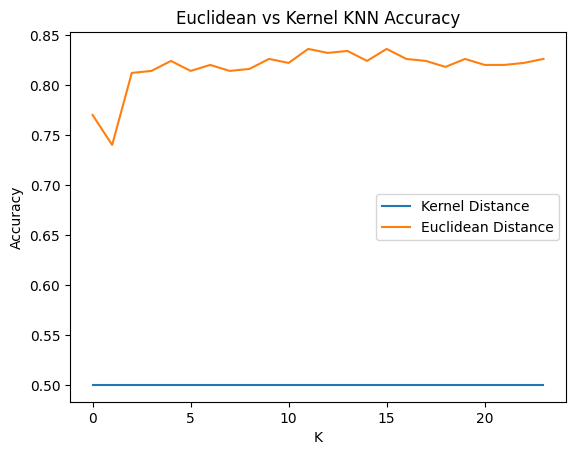

In [92]:
k_accs = []
e_accs = []
for i in range(1,25):
  k_pred, e_pred = knn_predict(p1_x_train, p1_y_train, p1_x_test, k=i)
  k_acc = np.mean(k_pred == p1_y_test)
  e_acc = np.mean(e_pred == p1_y_test)
  k_accs.append(k_acc)
  e_accs.append(e_acc)
plt.plot(k_accs)
plt.plot(e_accs)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Euclidean vs Kernel KNN Accuracy")
plt.legend(["Kernel Distance", "Euclidean Distance"])
plt.show()


In [ ]:
def poly_kernel(u, v, d):
    return (1 + np.dot(u, v)) ** d

def rbf_kernel(u, v, gamma):
    return np.exp(-gamma * np.linalg.norm(u - v) ** 2)

def custom_kernel(u, v, gamma):
    rbf = np.exp(-gamma * np.linalg.norm(u - v) ** 2)
    return -rbf / (1 + rbf)

In [107]:
def kernel_regression_predict(x, x_train, y_train, kernel_fn, **kernel_params):
    num = 0.0
    den = 0.0

    n, _ = x_train.shape
    for i in range(n):
        k = kernel_fn(x, x_train[i], **kernel_params) 
        num += k * y_train[i]
        den += k
    return num / den

In [108]:
def predict_set(X_test, x_train, y_train, kernel_fn, **kernel_params):
    preds = []
    for x in X_test:
        preds.append(kernel_regression_predict(x, x_train, y_train, kernel_fn, **kernel_params))
    return preds


In [110]:
def mse(pred, truth):
    return np.mean((pred - truth) ** 2)


In [112]:
dims = [1,2,3,4,6]
rhos = [1,10,100,1000]

for d in dims:
    preds = predict_set(x_test, x_train, y_train, poly_kernel, d=d)
    print("mse:", mse(preds, y_test))

for r in rhos:
    preds = predict_set(x_test, x_train, y_train, rbf_kernel, gamma=r)
    print("mse:", mse(preds, y_test))

for r in rhos:
    preds = predict_set(x_test, x_train, y_train, custom_kernel, gamma=r)
    print("mse:", mse(preds, y_test))

mse: 0.25002697346998304
mse: 0.24648365041559722
mse: 0.24706111215993848
mse: 0.2489671009808361
mse: 0.2558833093079984
mse: 0.24233963841022266
mse: 0.18775321637298412
mse: 0.12577911248932414
mse: 0.17701597366489683
mse: 0.2456836196898085
mse: 0.1999067404464608
mse: 0.12602672045355154
mse: 0.17294522889618813


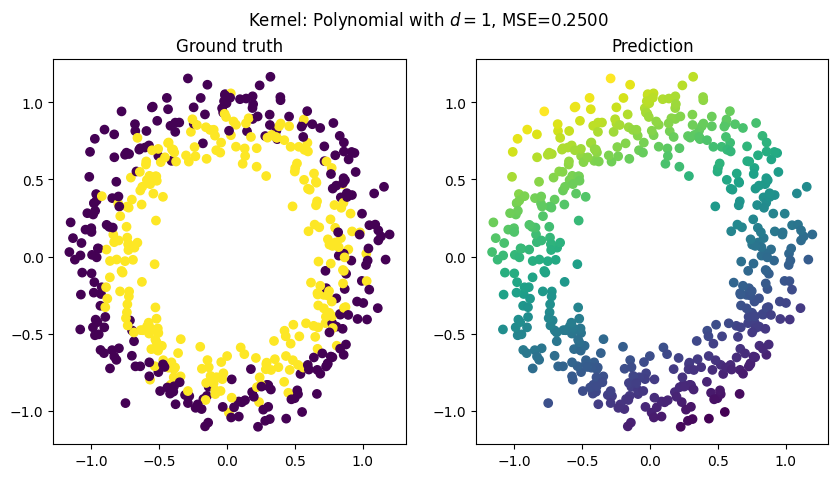

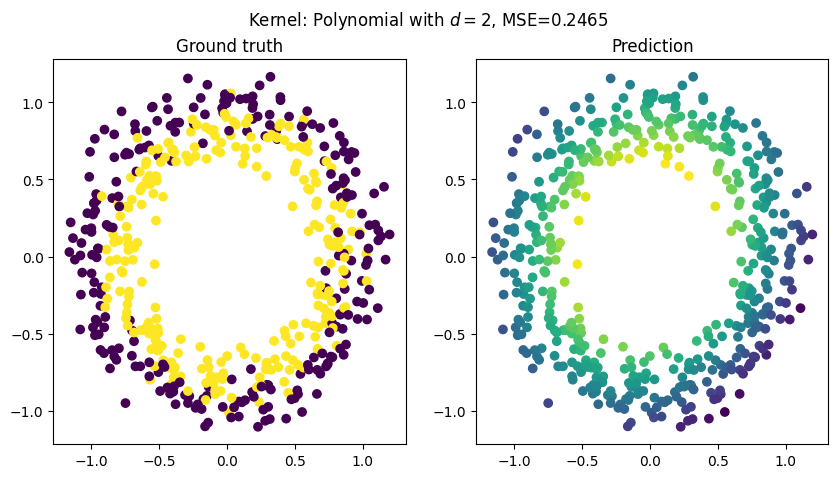

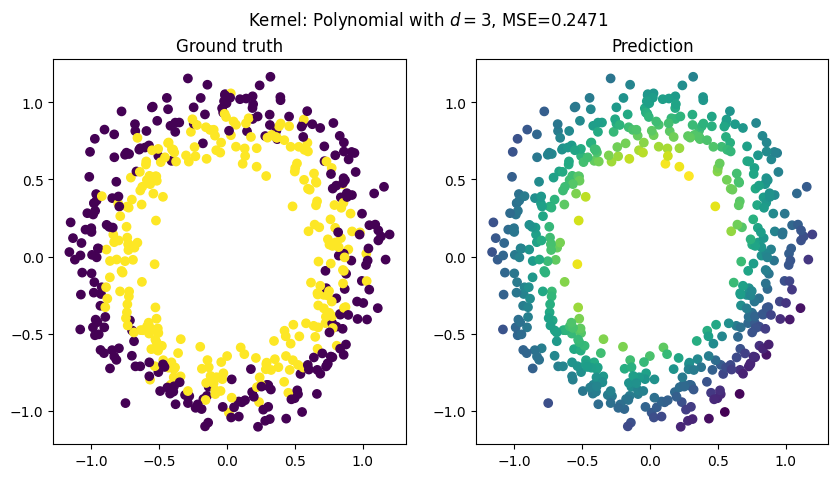

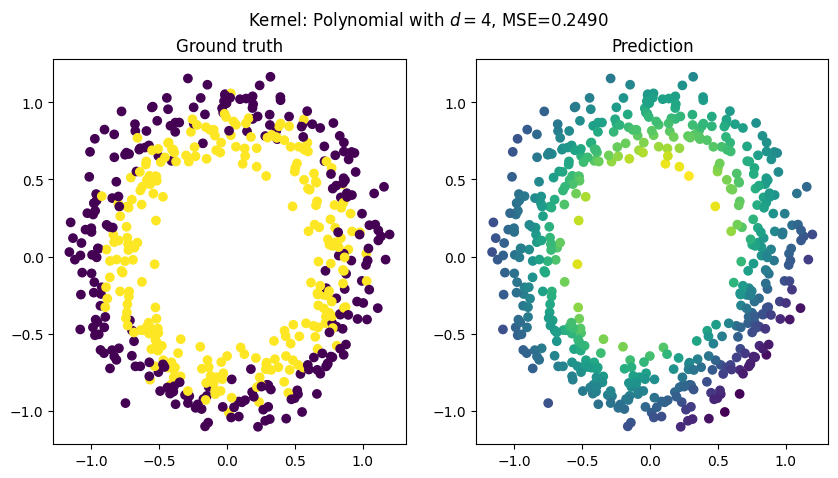

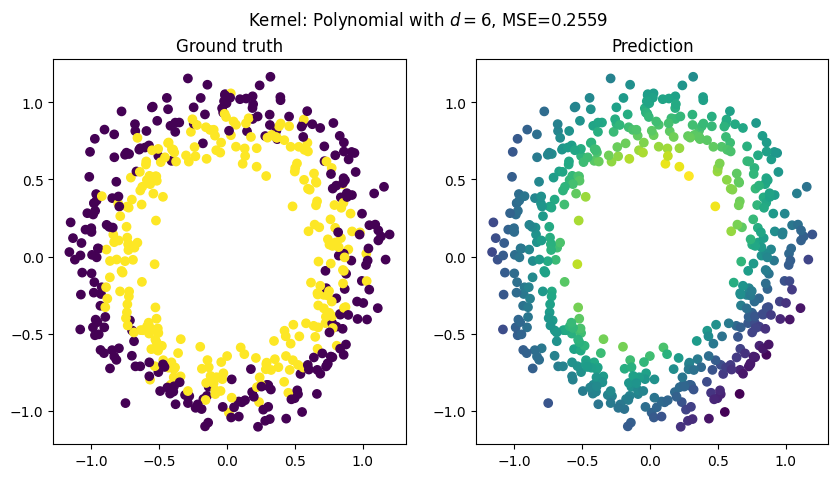

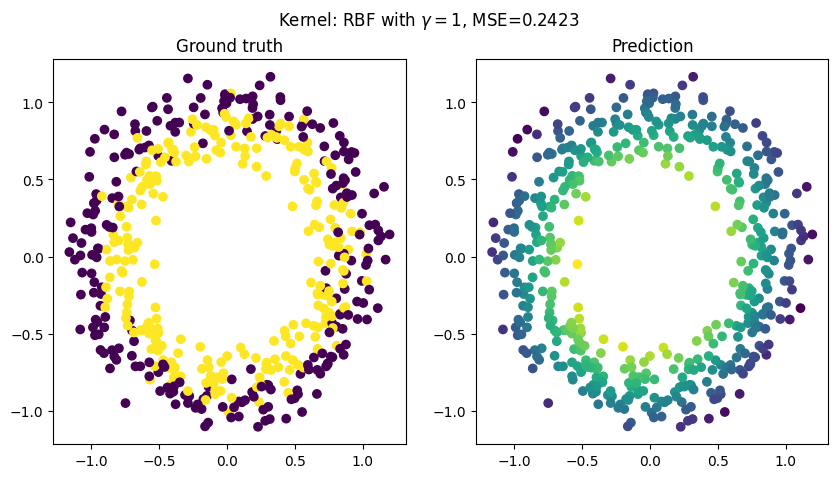

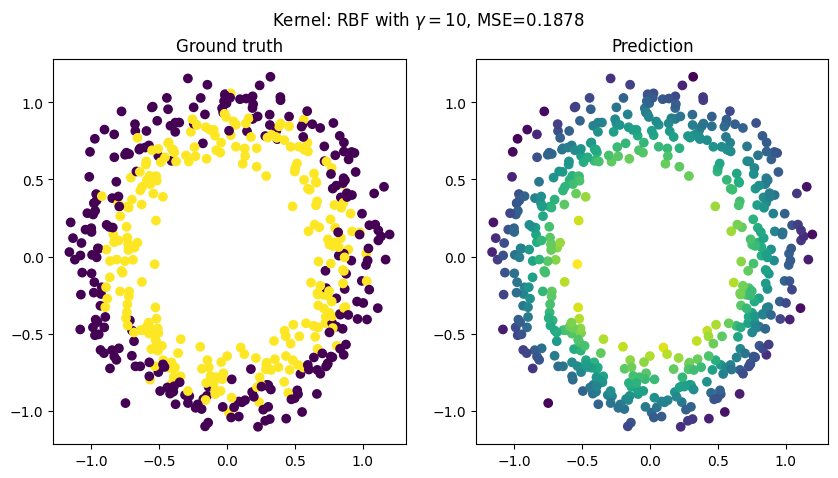

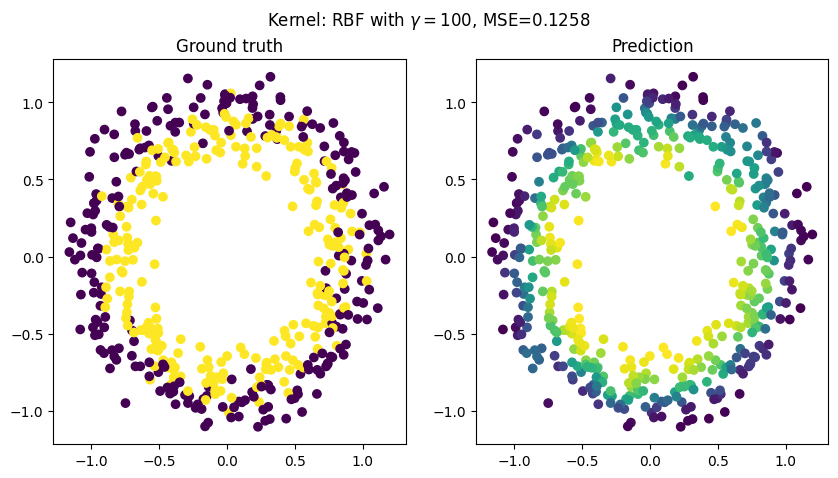

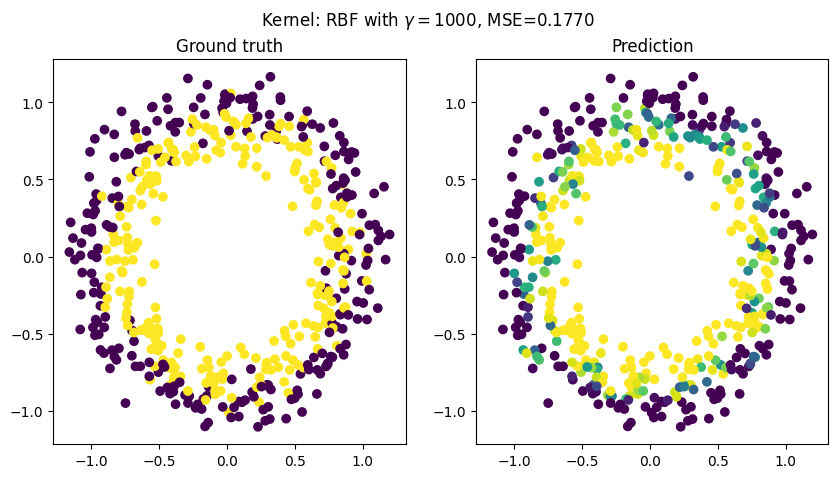

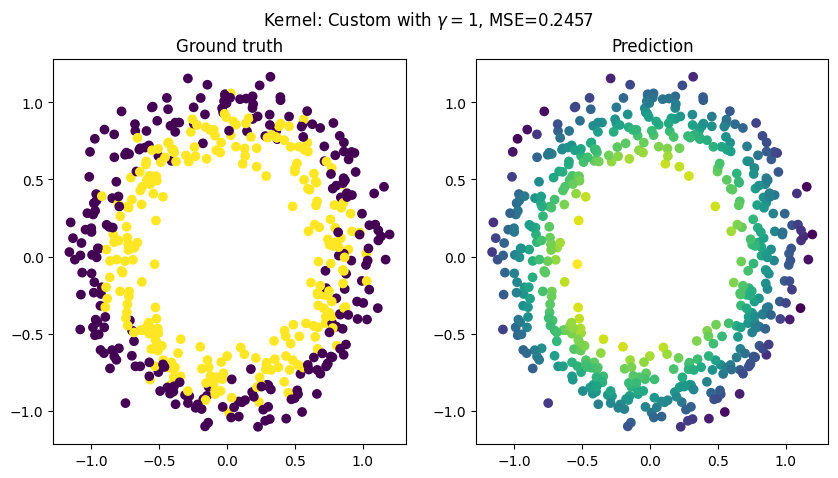

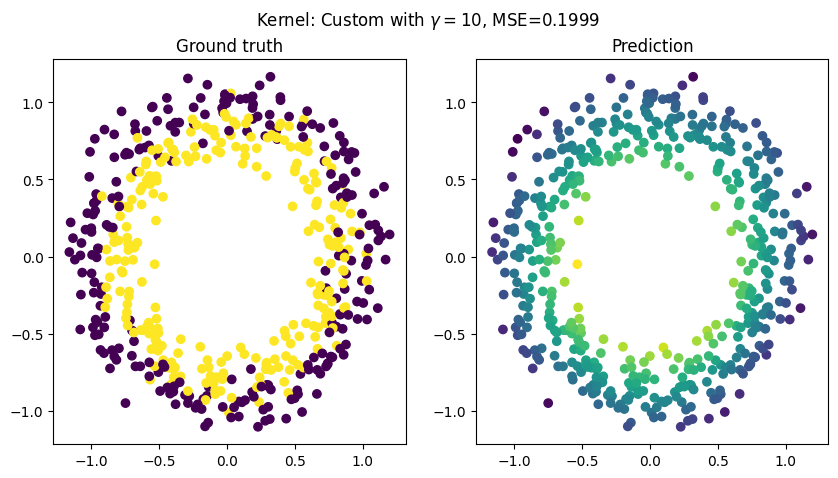

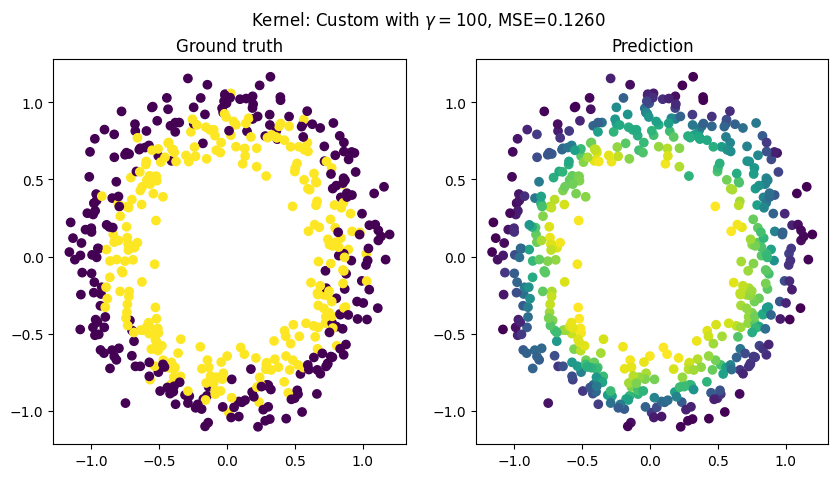

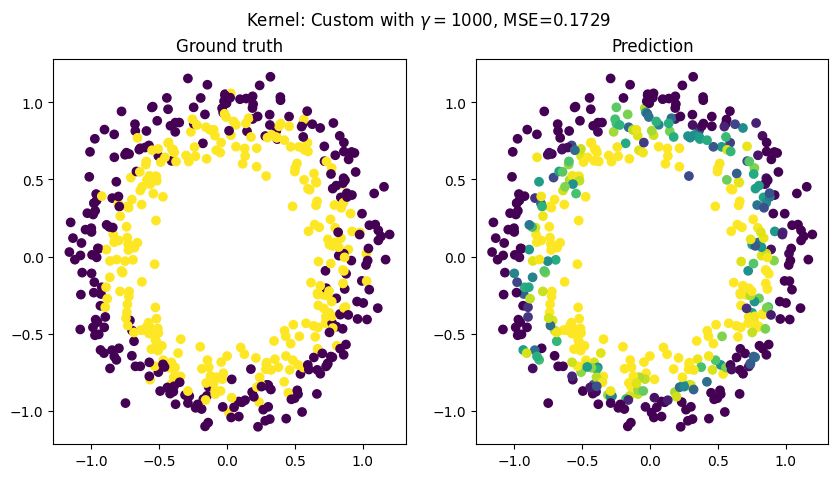

In [116]:
for d in dims:
    preds = predict_set(x_test, x_train, y_train, poly_kernel, d=d)
    mse_value = mse(preds, y_test)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].scatter(x_test[:, 0], x_test[:, 1], c=y_test)
    ax[0].set_title('Ground truth')

    ax[1].scatter(x_test[:, 0], x_test[:, 1], c=preds)
    ax[1].set_title('Prediction')

    fig.suptitle(r'Kernel: Polynomial with $d=%d$, MSE=%.4f' % (d, mse_value))
    plt.show()

for r in rhos:
    preds = predict_set(x_test, x_train, y_train, rbf_kernel, gamma=r)
    mse_value = mse(preds, y_test)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].scatter(x_test[:, 0], x_test[:, 1], c=y_test)
    ax[0].set_title('Ground truth')

    ax[1].scatter(x_test[:, 0], x_test[:, 1], c=preds)
    ax[1].set_title('Prediction')

    fig.suptitle(r'Kernel: RBF with $\gamma=%d$, MSE=%.4f' % (r, mse_value))
    plt.show()

for r in rhos:
    preds = predict_set(x_test, x_train, y_train, custom_kernel, gamma=r)
    mse_value = mse(preds, y_test)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].scatter(x_test[:, 0], x_test[:, 1], c=y_test)
    ax[0].set_title('Ground truth')

    ax[1].scatter(x_test[:, 0], x_test[:, 1], c=preds)
    ax[1].set_title('Prediction')

    fig.suptitle(r'Kernel: Custom with $\gamma=%d$, MSE=%.4f' % (r, mse_value))
    plt.show()


In [ ]:
def build_lsh_index